In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import ast

In [3]:
movies = pd.read_csv('/content/drive/MyDrive/Movie Dataset/tmdb_5000_movies.csv')
credits = pd.read_csv('/content/drive/MyDrive/Movie Dataset/tmdb_5000_credits.csv')

In [4]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
movies = movies.merge(credits, on='title')

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [8]:
#taking only gener id keywords title overview cast crew
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4809 non-null   int64 
 1   title     4809 non-null   object
 2   overview  4806 non-null   object
 3   genres    4809 non-null   object
 4   keywords  4809 non-null   object
 5   cast      4809 non-null   object
 6   crew      4809 non-null   object
dtypes: int64(1), object(6)
memory usage: 300.6+ KB


In [10]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [11]:
movies.dropna(inplace=True)

In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4806 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4806 non-null   int64 
 1   title     4806 non-null   object
 2   overview  4806 non-null   object
 3   genres    4806 non-null   object
 4   keywords  4806 non-null   object
 5   cast      4806 non-null   object
 6   crew      4806 non-null   object
dtypes: int64(1), object(6)
memory usage: 300.4+ KB


In [13]:
#converting dictionary to list
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name'])
    return L

In [14]:
movies['genres'] = movies['genres'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [15]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [16]:
movies['cast'] = movies['cast'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [17]:
#taking only first three actors
movies['cast'] = movies['cast'].apply(lambda x: x[:3])
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [18]:
# Function to fetch director names
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L

In [19]:
#taking only directors as a crew
movies['crew'] = movies['crew'].apply(fetch_director)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [20]:
#removing space
def collapse(L):
    L1 = [i.replace(" ", "") for i in L]
    return L1

In [21]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

In [22]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [23]:
movies['overview'] = movies['overview'].apply(lambda x: x.split())
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [24]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [25]:
# Combined the tags into a single string
movies['tags'] = movies['tags'].apply(lambda x: " ".join(x))
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],Following the death of District Attorney Harve...
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"John Carter is a war-weary, former military ca..."


In [26]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['tags'])

In [27]:
# Applying KMeans clustering
k = 500  # Number of clusters (you can change this as needed)
kmeans = KMeans(n_clusters=k, n_init=5, random_state=42)
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=500, n_init=5, random_state=42)

In [28]:
# Adding the predicted clusters to the movies DataFrame
movies['cluster'] = kmeans.labels_

In [29]:
def recommend_movies_kmeans(movie_title):
    # Find the movie index
    movie_index = movies[movies['title'] == movie_title].index[0]

    # Extract the cluster of the input movie
    movie_cluster = movies.iloc[movie_index]['cluster']

    # Find all movies in the same cluster, excluding the input movie
    recommended_movies = movies[movies['cluster'] == movie_cluster]
    recommended_movies = recommended_movies[recommended_movies['title'] != movie_title]['title']

    # Limit recommendations to a maximum of 5 movies
    recommended_movies = recommended_movies.head(5)

    return recommended_movies

In [30]:
def recommend_movies(movie_title):
    recommended_movies = recommend_movies_kmeans(movie_title)
    if recommended_movies.empty:
        print("No recommendations found.")
    else:
        print(f"Recommended Movies based on '{movie_title}':")
        for movie in recommended_movies:
            print(movie)

In [31]:
recommend_movies('Interstellar')

Recommended Movies based on 'Interstellar':
Gravity
Sphere
Space Cowboys
Zathura: A Space Adventure
Solaris


In [32]:
recommend_movies('Titanic')

Recommended Movies based on 'Titanic':
King Kong
WALL·E
Master and Commander: The Far Side of the World
Event Horizon
Supernova


In [33]:
recommend_movies('The Conjuring')

Recommended Movies based on 'The Conjuring':
What Lies Beneath
The Conjuring 2
Scary Movie 4
Scary Movie 5
The Unborn


In [34]:
recommend_movies('Spider-Man')

Recommended Movies based on 'Spider-Man':
Spider-Man 3
The Amazing Spider-Man
Spider-Man 2
The Amazing Spider-Man 2
Arachnophobia


In [35]:
recommend_movies('The Matrix')

Recommended Movies based on 'The Matrix':
The Matrix Revolutions
The Matrix Reloaded
Blade Runner
Dark City
Commando


In [ ]:
# Calculate silhouette score
silhouette_avg = silhouette_score(tfidf_matrix, kmeans.labels_)
print(f"The average silhouette_score for {k} clusters is: {silhouette_avg}")

The average silhouette_score for 500 clusters is: 0.01128419758877495


In [ ]:
import matplotlib.pyplot as plt

# Initialize an empty list to store SSE values for each k
sse_values = []

# Define a range of k values to test
k_values = range(10, 4000, 15)  # You can adjust the range as needed

# Calculate SSE for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=5, random_state=42)
    kmeans.fit(tfidf_matrix)
    sse_values.append(kmeans.inertia_)
    print(f"for k = {k} sse is {kmeans.inertia_}")

for k = 10 sse is 4658.598741865822
for k = 25 sse is 4594.148488826189
for k = 40 sse is 4553.906393128166
for k = 55 sse is 4523.7945400821745
for k = 70 sse is 4490.670044561402
for k = 85 sse is 4457.375379828081
for k = 100 sse is 4439.142053981768
for k = 115 sse is 4415.138040452246
for k = 130 sse is 4390.441502065292
for k = 145 sse is 4370.040497163674
for k = 160 sse is 4342.255258629833
for k = 175 sse is 4319.354681730044
for k = 190 sse is 4299.001231787834
for k = 205 sse is 4278.596434103565
for k = 220 sse is 4251.923085062821
for k = 235 sse is 4234.981933460112
for k = 250 sse is 4208.613574053951
for k = 265 sse is 4190.340004603233
for k = 280 sse is 4167.209954875198
for k = 295 sse is 4147.679791300431
for k = 310 sse is 4126.0821574361225
for k = 325 sse is 4099.490400821447
for k = 340 sse is 4081.0268294766047
for k = 355 sse is 4057.483947428479
for k = 370 sse is 4038.1622843548103
for k = 385 sse is 4014.519625035228
for k = 400 sse is 3997.318830982306
for

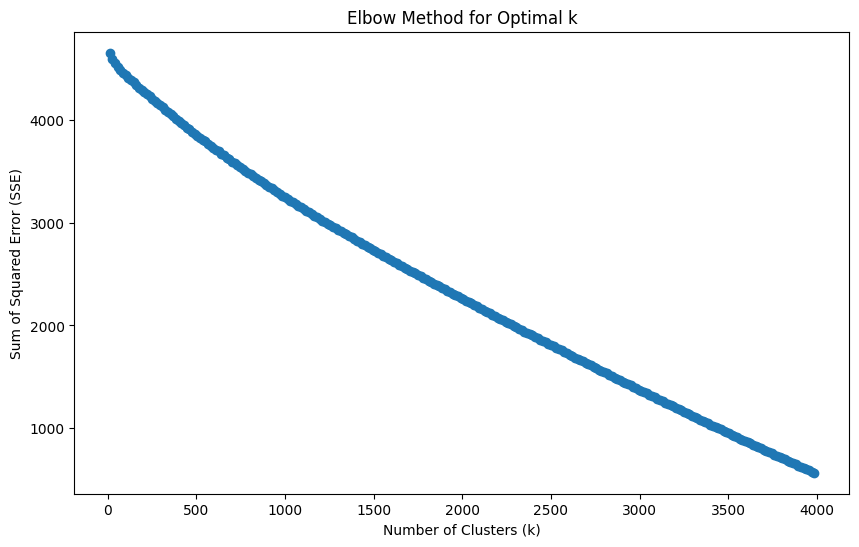

In [ ]:
# Plot the SSE values
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Initialize an empty list to store SSE values for each k
sse_values = []

# Define a range of k values to test
k_values = range(50, 4000, 50)  # You can adjust the range as needed

# Calculate SSE for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=5, random_state=42)
    kmeans.fit(tfidf_matrix)
    sse_values.append(kmeans.inertia_)
    print(f"for k = {k} sse is {kmeans.inertia_}")

for k = 50 sse is 4532.756922269497
for k = 100 sse is 4439.142053981768
for k = 150 sse is 4363.909138852017
for k = 200 sse is 4286.427023422436
for k = 250 sse is 4208.613574053951
for k = 300 sse is 4138.093764568034
for k = 350 sse is 4068.7999940223253
for k = 400 sse is 3997.318830982306
for k = 450 sse is 3922.131337674848
for k = 500 sse is 3859.738846237574
for k = 550 sse is 3793.369860846885
for k = 600 sse is 3726.472845942758
for k = 650 sse is 3662.999260760146
for k = 700 sse is 3598.176027674591
for k = 750 sse is 3538.757546864577
for k = 800 sse is 3478.28346709167
for k = 850 sse is 3421.167775575049
for k = 900 sse is 3363.9835055650383
for k = 950 sse is 3306.212273940341
for k = 1000 sse is 3249.417559298061
for k = 1050 sse is 3195.423387669363
for k = 1100 sse is 3139.75996534855
for k = 1150 sse is 3086.2935585112564
for k = 1200 sse is 3034.6231294945424
for k = 1250 sse is 2981.916485380407
for k = 1300 sse is 2934.1525268244736
for k = 1350 sse is 2880.3365

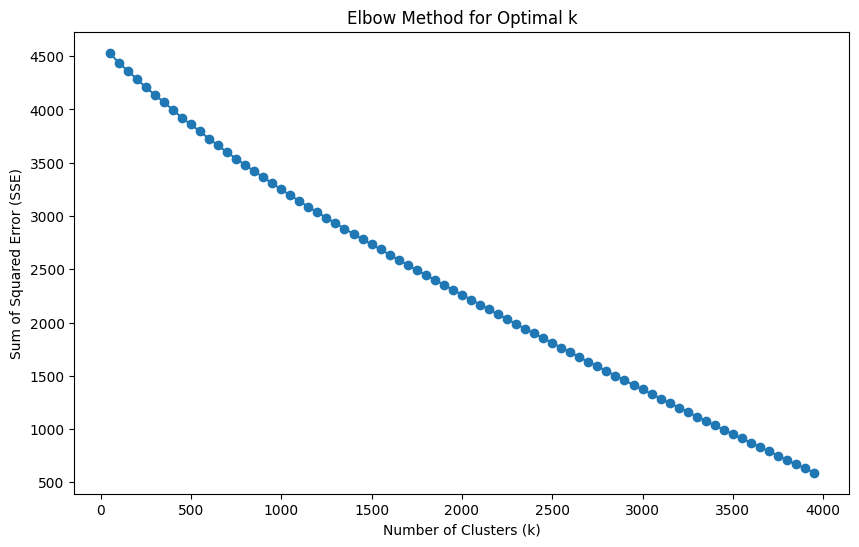

In [ ]:
# Plot the SSE values
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

for k = 10 sse is 4658.598741865822
for k = 20 sse is 4611.64526243634
for k = 30 sse is 4581.9481569411055
for k = 40 sse is 4553.906393128166
for k = 50 sse is 4532.756922269497
for k = 60 sse is 4510.333531186603
for k = 70 sse is 4490.670044561402
for k = 80 sse is 4474.246024853821
for k = 90 sse is 4454.239298685396
for k = 100 sse is 4439.142053981768
for k = 110 sse is 4420.201374431746
for k = 120 sse is 4414.995596205839
for k = 130 sse is 4390.441502065292
for k = 140 sse is 4379.774891663159
for k = 150 sse is 4363.909138852017
for k = 160 sse is 4342.255258629833
for k = 170 sse is 4330.337664626204
for k = 180 sse is 4318.580914261793
for k = 190 sse is 4299.001231787834
for k = 200 sse is 4286.427023422436
for k = 210 sse is 4268.5980019642975
for k = 220 sse is 4251.923085062821
for k = 230 sse is 4240.219099425733
for k = 240 sse is 4230.761192626564


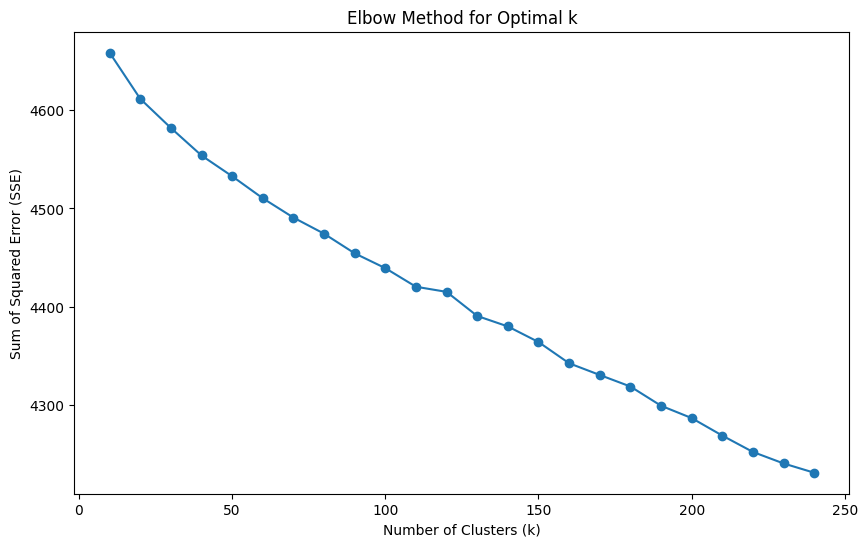

In [42]:
import matplotlib.pyplot as plt

# Initialize an empty list to store SSE values for each k
sse_values = []

# Define a range of k values to test
k_values = range(10, 250, 10)  # You can adjust the range as needed

# Calculate SSE for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=5, random_state=42)
    kmeans.fit(tfidf_matrix)
    sse_values.append(kmeans.inertia_)
    print(f"for k = {k} sse is {kmeans.inertia_}")
# Plot the SSE values
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

for k = 200 sse is 4286.427023422436
for k = 220 sse is 4251.923085062821
for k = 240 sse is 4230.761192626564
for k = 260 sse is 4196.898856697939
for k = 280 sse is 4167.209954875198
for k = 300 sse is 4138.093764568034
for k = 320 sse is 4110.664908707182
for k = 340 sse is 4081.0268294766047
for k = 360 sse is 4051.0094860166773
for k = 380 sse is 4025.472763856628
for k = 400 sse is 3997.318830982306
for k = 420 sse is 3965.4868290613713
for k = 440 sse is 3936.9954677623928
for k = 460 sse is 3912.2197428297477
for k = 480 sse is 3885.34460209989
for k = 500 sse is 3859.738846237574
for k = 520 sse is 3829.9299633890023
for k = 540 sse is 3802.104955395316
for k = 560 sse is 3775.3823078058176
for k = 580 sse is 3753.915982313946


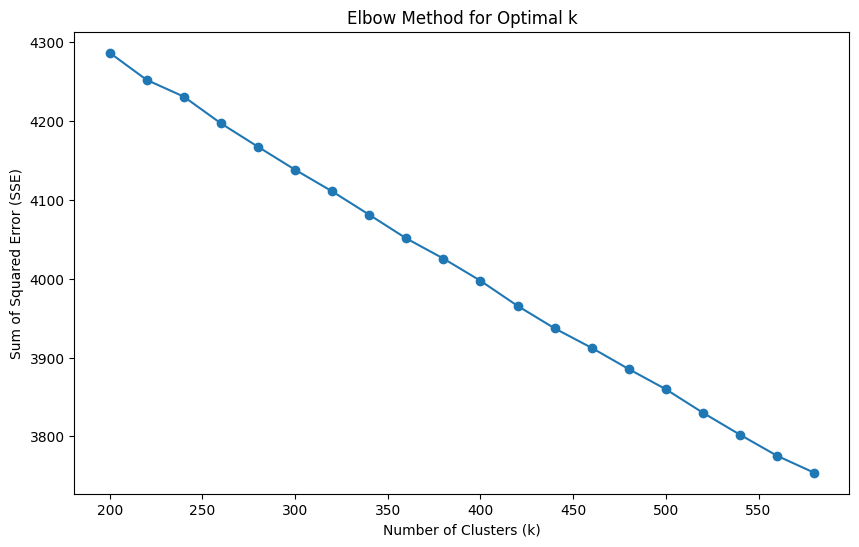

In [43]:
# Initialize an empty list to store SSE values for each k
sse_values = []

# Define a range of k values to test
k_values = range(200, 600, 20)  # You can adjust the range as needed

# Calculate SSE for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=5, random_state=42)
    kmeans.fit(tfidf_matrix)
    sse_values.append(kmeans.inertia_)
    print(f"for k = {k} sse is {kmeans.inertia_}")
# Plot the SSE values
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

In [ ]:
def find_best_cluster(data, max_clusters):
    best_score = -1
    best_cluster = 0

    for n_clusters in range(5, max_clusters + 1, 10):
        kmeans = KMeans(n_clusters=n_clusters, n_init=5, random_state=42)
        kmeans.fit(tfidf_matrix)
        silhouette_avg = silhouette_score(data, kmeans.labels_)
        print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_cluster = n_clusters

    return best_cluster, best_score

best_cluster, best_score = find_best_cluster(tfidf_matrix, 100)
print(f"The best number of clusters is {best_cluster} with a silhouette score of {best_score}")

For n_clusters = 5, the average silhouette_score is: 0.004059171361407071
For n_clusters = 15, the average silhouette_score is: 0.005367235712217719
For n_clusters = 25, the average silhouette_score is: 0.006102093530027971
For n_clusters = 35, the average silhouette_score is: 0.005671521324636166
For n_clusters = 45, the average silhouette_score is: 0.006027338205906978
For n_clusters = 55, the average silhouette_score is: 0.006419652935301618
For n_clusters = 65, the average silhouette_score is: 0.007335272043641736
For n_clusters = 75, the average silhouette_score is: 0.007037664467543381
For n_clusters = 85, the average silhouette_score is: 0.007515794105688422
For n_clusters = 95, the average silhouette_score is: 0.006952366751683377
The best number of clusters is 85 with a silhouette score of 0.007515794105688422


In [ ]:
def find_best_cluster(data, max_clusters):
    best_score = -1
    best_cluster = 0

    for n_clusters in range(105, max_clusters + 1, 10):
        kmeans = KMeans(n_clusters=n_clusters, n_init=5, random_state=42)
        kmeans.fit(tfidf_matrix)
        silhouette_avg = silhouette_score(data, kmeans.labels_)
        print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_cluster = n_clusters

    return best_cluster, best_score

best_cluster, best_score = find_best_cluster(tfidf_matrix, 200)
print(f"The best number of clusters is {best_cluster} with a silhouette score of {best_score}")

For n_clusters = 105, the average silhouette_score is: 0.007101771363084533
For n_clusters = 115, the average silhouette_score is: 0.007740901482838153
For n_clusters = 125, the average silhouette_score is: 0.006447306399693407
For n_clusters = 135, the average silhouette_score is: 0.007145930269447056
For n_clusters = 145, the average silhouette_score is: 0.007458383058545027
For n_clusters = 155, the average silhouette_score is: 0.006927810861460197
For n_clusters = 165, the average silhouette_score is: 0.007581539245784327
For n_clusters = 175, the average silhouette_score is: 0.007867179237806665
For n_clusters = 185, the average silhouette_score is: 0.008314007087875446
For n_clusters = 195, the average silhouette_score is: 0.007446644958239172
The best number of clusters is 185 with a silhouette score of 0.008314007087875446


In [ ]:
def find_best_cluster(data, max_clusters):
    best_score = -1
    best_cluster = 0

    for n_clusters in range(205, max_clusters + 1, 10):
        kmeans = KMeans(n_clusters=n_clusters, n_init=5, random_state=42)
        kmeans.fit(tfidf_matrix)
        silhouette_avg = silhouette_score(data, kmeans.labels_)
        print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_cluster = n_clusters

    return best_cluster, best_score

best_cluster, best_score = find_best_cluster(tfidf_matrix, 300)
print(f"The best number of clusters is {best_cluster} with a silhouette score of {best_score}")

For n_clusters = 205, the average silhouette_score is: 0.007715632450963978
For n_clusters = 215, the average silhouette_score is: 0.007820543437554969
For n_clusters = 225, the average silhouette_score is: 0.008591690948906246
For n_clusters = 235, the average silhouette_score is: 0.009288656791790148
For n_clusters = 245, the average silhouette_score is: 0.008180513180260718
For n_clusters = 255, the average silhouette_score is: 0.008696591354388937
For n_clusters = 265, the average silhouette_score is: 0.00900575795455783
For n_clusters = 275, the average silhouette_score is: 0.009405746315183034
For n_clusters = 285, the average silhouette_score is: 0.009499137236482593
For n_clusters = 295, the average silhouette_score is: 0.009174532546971297
The best number of clusters is 285 with a silhouette score of 0.009499137236482593


In [ ]:
def find_best_cluster(data, max_clusters):
    best_score = -1
    best_cluster = 0

    for n_clusters in range(305, max_clusters + 1, 10):
        kmeans = KMeans(n_clusters=n_clusters, n_init=5, random_state=42)
        kmeans.fit(tfidf_matrix)
        silhouette_avg = silhouette_score(data, kmeans.labels_)
        print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_cluster = n_clusters

    return best_cluster, best_score

best_cluster, best_score = find_best_cluster(tfidf_matrix, 500)
print(f"The best number of clusters is {best_cluster} with a silhouette score of {best_score}")

For n_clusters = 305, the average silhouette_score is: 0.00923576858809075
For n_clusters = 315, the average silhouette_score is: 0.009361548217051298
For n_clusters = 325, the average silhouette_score is: 0.00954526723727084
For n_clusters = 335, the average silhouette_score is: 0.010543851980194951
For n_clusters = 345, the average silhouette_score is: 0.01018670329202428
For n_clusters = 355, the average silhouette_score is: 0.010324404826777593
For n_clusters = 365, the average silhouette_score is: 0.009638253780467941
For n_clusters = 375, the average silhouette_score is: 0.010546029756204833
For n_clusters = 385, the average silhouette_score is: 0.010681887157596756
For n_clusters = 395, the average silhouette_score is: 0.010673353669812192
For n_clusters = 405, the average silhouette_score is: 0.011564195230786308
For n_clusters = 415, the average silhouette_score is: 0.011267452430300208
For n_clusters = 425, the average silhouette_score is: 0.010326038440239447
For n_clusters 

In [ ]:
def find_best_cluster(data, max_clusters):
    best_score = -1
    best_cluster = 0

    for n_clusters in range(505, max_clusters + 1, 10):
        kmeans = KMeans(n_clusters=n_clusters, n_init=5, random_state=42)
        kmeans.fit(tfidf_matrix)
        silhouette_avg = silhouette_score(data, kmeans.labels_)
        print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_cluster = n_clusters

    return best_cluster, best_score

best_cluster, best_score = find_best_cluster(tfidf_matrix, 1000)
print(f"The best number of clusters is {best_cluster} with a silhouette score of {best_score}")

For n_clusters = 505, the average silhouette_score is: 0.012098528722699304
For n_clusters = 515, the average silhouette_score is: 0.01264218244117173
For n_clusters = 525, the average silhouette_score is: 0.011806387129421766
For n_clusters = 535, the average silhouette_score is: 0.013256027325292132
For n_clusters = 545, the average silhouette_score is: 0.012867304675300785
For n_clusters = 555, the average silhouette_score is: 0.012818896155765596
For n_clusters = 565, the average silhouette_score is: 0.012905155675962787
For n_clusters = 575, the average silhouette_score is: 0.012156817424552787
For n_clusters = 585, the average silhouette_score is: 0.012942048363915677
For n_clusters = 595, the average silhouette_score is: 0.013179483637341817
For n_clusters = 605, the average silhouette_score is: 0.01276442783461287
For n_clusters = 615, the average silhouette_score is: 0.012984987752918325
For n_clusters = 625, the average silhouette_score is: 0.012458452355176026
For n_clusters

In [ ]:
def find_best_cluster(data, max_clusters):
    best_score = -1
    best_cluster = 0

    for n_clusters in range(1005, max_clusters + 1, 10):
        kmeans = KMeans(n_clusters=n_clusters, n_init=5, random_state=42)
        kmeans.fit(tfidf_matrix)
        silhouette_avg = silhouette_score(data, kmeans.labels_)
        print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_cluster = n_clusters

    return best_cluster, best_score

best_cluster, best_score = find_best_cluster(tfidf_matrix, 1500)
print(f"The best number of clusters is {best_cluster} with a silhouette score of {best_score}")

For n_clusters = 1005, the average silhouette_score is: 0.017309370502175014
For n_clusters = 1015, the average silhouette_score is: 0.01728181615899506
For n_clusters = 1025, the average silhouette_score is: 0.01726710546500787
For n_clusters = 1035, the average silhouette_score is: 0.017099636526110157
For n_clusters = 1045, the average silhouette_score is: 0.016488025223449877
For n_clusters = 1055, the average silhouette_score is: 0.017170908851382605
For n_clusters = 1065, the average silhouette_score is: 0.017327978261396697
For n_clusters = 1075, the average silhouette_score is: 0.01712196754159127
For n_clusters = 1085, the average silhouette_score is: 0.017501275729432494
For n_clusters = 1095, the average silhouette_score is: 0.018094371342830352
For n_clusters = 1105, the average silhouette_score is: 0.018118836960580996
For n_clusters = 1115, the average silhouette_score is: 0.017257190620877518
For n_clusters = 1125, the average silhouette_score is: 0.017679629120788954
Fo

In [ ]:
def find_best_cluster(data, max_clusters):
    best_score = -1
    best_cluster = 0

    for n_clusters in range(1505, max_clusters + 1, 10):
        kmeans = KMeans(n_clusters=n_clusters, n_init=5, random_state=42)
        kmeans.fit(tfidf_matrix)
        silhouette_avg = silhouette_score(data, kmeans.labels_)
        print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_cluster = n_clusters

    return best_cluster, best_score

best_cluster, best_score = find_best_cluster(tfidf_matrix, 2000)
print(f"The best number of clusters is {best_cluster} with a silhouette score of {best_score}")

For n_clusters = 1505, the average silhouette_score is: 0.018818018787017866
For n_clusters = 1515, the average silhouette_score is: 0.018692380740372348
For n_clusters = 1525, the average silhouette_score is: 0.018325498833047908
For n_clusters = 1535, the average silhouette_score is: 0.018818394870963484
For n_clusters = 1545, the average silhouette_score is: 0.018267898905170082
For n_clusters = 1555, the average silhouette_score is: 0.01817144209300008
For n_clusters = 1565, the average silhouette_score is: 0.01826159129940477
For n_clusters = 1575, the average silhouette_score is: 0.018887023059508422
For n_clusters = 1585, the average silhouette_score is: 0.018334365151241032
For n_clusters = 1595, the average silhouette_score is: 0.01910294094075593
For n_clusters = 1605, the average silhouette_score is: 0.01852387659712146
For n_clusters = 1615, the average silhouette_score is: 0.01828320280055061
For n_clusters = 1625, the average silhouette_score is: 0.018691718522281516
For 

In [36]:
# Applying KMeans clustering
k = 1775  # Number of clusters (you can change this as needed)
kmeans = KMeans(n_clusters=k, n_init=5, random_state=42)
kmeans.fit(tfidf_matrix)
# Adding the predicted clusters to the movies DataFrame
movies['cluster'] = kmeans.labels_
def recommend_movies_kmeans(movie_title):
    # Find the movie index
    movie_index = movies[movies['title'] == movie_title].index[0]

    # Extract the cluster of the input movie
    movie_cluster = movies.iloc[movie_index]['cluster']

    # Find all movies in the same cluster, excluding the input movie
    recommended_movies = movies[movies['cluster'] == movie_cluster]
    recommended_movies = recommended_movies[recommended_movies['title'] != movie_title]['title']

    # Limit recommendations to a maximum of 5 movies
    recommended_movies = recommended_movies.head(5)

    return recommended_movies
def recommend_movies(movie_title):
    recommended_movies = recommend_movies_kmeans(movie_title)
    if recommended_movies.empty:
        print("No recommendations found.")
    else:
        print(f"Recommended Movies based on '{movie_title}':")
        for movie in recommended_movies:
            print(movie)

In [37]:
recommend_movies('Interstellar')

Recommended Movies based on 'Interstellar':
Space Cowboys
The Andromeda Strain


In [38]:
recommend_movies('Titanic')

Recommended Movies based on 'Titanic':
Poseidon
Ghost Ship


In [39]:
recommend_movies('The Conjuring')

Recommended Movies based on 'The Conjuring':
The Conjuring 2


In [40]:
recommend_movies('Spider-Man')

Recommended Movies based on 'Spider-Man':
Spider-Man 3
Spider-Man 2
Charlotte's Web
Arachnophobia


In [41]:
recommend_movies('The Matrix')

Recommended Movies based on 'The Matrix':
The Matrix Revolutions
The Matrix Reloaded
